In [1]:
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load data paths
train_csv_path =r"C:\Users\Lakshmi\Untitled Folder 1\train.csv"


In [27]:
# Load CSV files
df = pd.read_csv(train_csv_path)


In [28]:
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively
...,...,...,...,...,...,...,...,...
704,Female,20,4,5,6,6,1,responsible
705,Male,18,6,3,1,5,5,dependable
706,Male,22,5,2,3,6,1,serious
707,Male,19,5,6,5,7,5,extraverted


In [29]:
print(df.columns)

Index(['Gender', 'Age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'Personality (class label)'],
      dtype='object')


In [30]:
print(df.info)

<bound method DataFrame.info of      Gender  Age  openness  neuroticism  conscientiousness  agreeableness  \
0      Male   17         7            4                  7              3   
1      Male   19         4            5                  4              6   
2    Female   18         7            6                  4              5   
3    Female   22         5            6                  7              4   
4    Female   19         7            4                  6              5   
..      ...  ...       ...          ...                ...            ...   
704  Female   20         4            5                  6              6   
705    Male   18         6            3                  1              5   
706    Male   22         5            2                  3              6   
707    Male   19         5            6                  5              7   
708  Female   18         5            5                  7              6   

     extraversion Personality (class label)

In [31]:
from sklearn.ensemble import RandomForestClassifier
df = pd.DataFrame(train_data)



In [32]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Gender'])

In [33]:
# Split the data into features (X) and labels (y)
X = df.drop('Personality (class label)', axis=1)
y = df['Personality (class label)']


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

In [36]:
# Train the classifier
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.25


In [39]:
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

  dependable       0.24      0.19      0.21        31
 extraverted       0.30      0.31      0.31        32
      lively       0.26      0.27      0.27        22
 responsible       0.22      0.23      0.22        22
     serious       0.24      0.26      0.25        35

    accuracy                           0.25       142
   macro avg       0.25      0.25      0.25       142
weighted avg       0.25      0.25      0.25       142



In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [41]:
# Standardize the features (optional but can be beneficial for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [44]:
# Use the best model from the grid search
best_clf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_clf.predict(X_test_scaled)


In [45]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

  dependable       0.24      0.16      0.19        31
 extraverted       0.32      0.31      0.32        32
      lively       0.23      0.36      0.28        22
 responsible       0.26      0.23      0.24        22
     serious       0.19      0.20      0.20        35

    accuracy                           0.25       142
   macro avg       0.25      0.25      0.25       142
weighted avg       0.25      0.25      0.24       142

Confusion Matrix:
 [[ 5  5 11  4  6]
 [ 5 10  6  2  9]
 [ 0  4  8  3  7]
 [ 3  4  3  5  7]
 [ 8  8  7  5  7]]


In [46]:
from sklearn.model_selection import cross_val_score
# Cross-validated accuracy scores
cv_scores = cross_val_score(best_clf, X_train_scaled, y_train, cv=5)
print("Cross-validated Accuracy Scores:", cv_scores)


Cross-validated Accuracy Scores: [0.30701754 0.27192982 0.22123894 0.30088496 0.30973451]


In [47]:
# Generate a report using classification_report
y_pred = best_clf.predict(X_test_scaled)
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Save the report to a CSV file
report_csv_file_path = 'prediction_report.csv'
report_df.to_csv(report_csv_file_path)

print(f"Prediction report saved to {report_csv_file_path}")

Confusion Matrix:
 [[ 5  5 11  4  6]
 [ 5 10  6  2  9]
 [ 0  4  8  3  7]
 [ 3  4  3  5  7]
 [ 8  8  7  5  7]]
Prediction report saved to prediction_report.csv


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

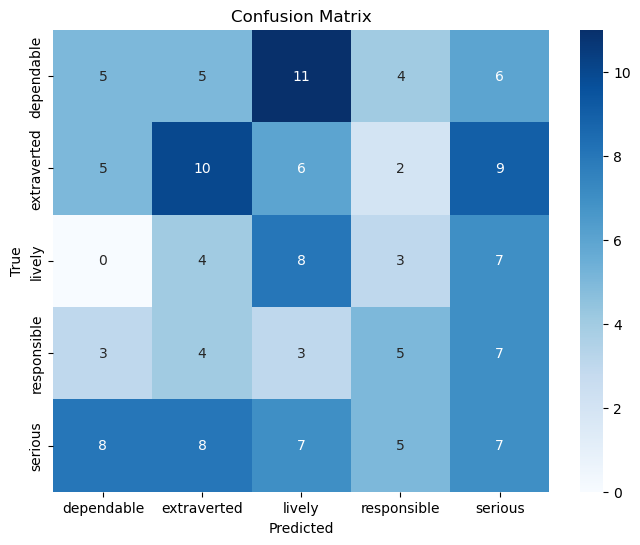

In [49]:
# Convert the report to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.show()